In [3]:
# 이 셀은 VSCode 환경 사용시에만 실행할 것!
%cd ..

c:\Users\jeong\Desktop\space-decomposition


In [4]:
import torch
from PIL import Image
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

from src.utils.imagenet_label import label_dict

In [5]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in C:\Users\jeong/.cache\torch\hub\pytorch_vision_v0.6.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

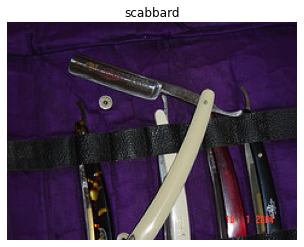

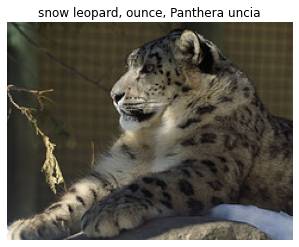

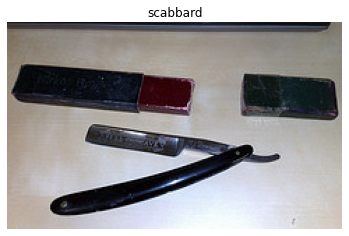

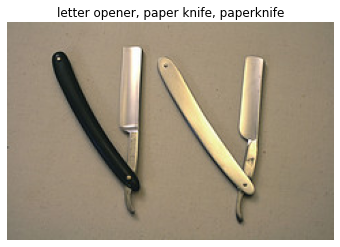

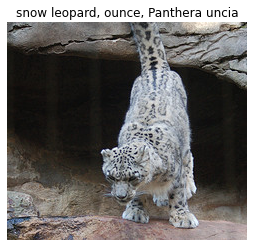

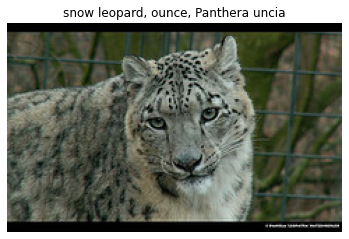

In [8]:
img_0 = Image.open("data/imagenet/test (1).jpg")
img_1 = Image.open("data/imagenet/test (2).jpg")
img_2 = Image.open("data/imagenet/test (3).jpg")
img_3 = Image.open("data/imagenet/test (4).jpg")
img_4 = Image.open("data/imagenet/test (5).jpg")
img_5 = Image.open("data/imagenet/test (6).jpg")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def visualize_prediction(img):
    x = transform(img)
    x.unsqueeze_(0)
    y = model(x)[0].argmax()
    plt.axis('off'); plt.title(label_dict[y.item()]); plt.imshow(img); plt.show()

visualize_prediction(img_0)
visualize_prediction(img_1)
visualize_prediction(img_2)
visualize_prediction(img_3)
visualize_prediction(img_4)
visualize_prediction(img_5)